In [1]:
"""
Created on Sat Jun  9 22:30:54 2018

@author: Wesley Lourenco Barbosa
"""
from IPython import get_ipython
get_ipython().magic('reset -sf')
from IPython import get_ipython
def __reset__(): get_ipython().magic('reset -sf')
  

import matplotlib.pyplot as plt
import fix_yahoo_finance as yf  
import numpy as np
import pandas as pd
import pylab
import seaborn as sns

# TASK 01
valid_opt = False
opt = 0
while(valid_opt==False):
        opt = 0
        print('\n#########  ##########\n',
              'Choose the stock exchange you want to compare agains the others:\n',
                  '1 - NYSE [New York Stock Exchange]\n',
                  '2 - NASDAQ [National Association of Securities Dealers Automated Quotations]\n',
                  '3 - LSE [London Stock Exchange]\n',
                  '4 - NSEI [National Stock Exchange of India]\n',
                  '5 - BM&F Bovespa [Bolsa de Valores do Estado de Sao Paulo]')
        try: 
            opt = int(input())
        except:
            print('Invalid Option')
            print('\Enter a number')
        if(opt not in [1,2,3,4,5]):
            print('Invalid Option')
            print('\Enter a valid option.')
            input("Press Enter") 
        else: 
            valid_opt = True
                       


#########  ##########
 Choose the stock exchange you want to compare agains the others:
 1 - NYSE [New York Stock Exchange]
 2 - NASDAQ [National Association of Securities Dealers Automated Quotations]
 3 - LSE [London Stock Exchange]
 4 - NSEI [National Stock Exchange of India]
 5 - BM&F Bovespa [Bolsa de Valores do Estado de Sao Paulo]
5


In [2]:
#TASK 02
#Each stock market will be attached to one index
stock_markets_dict = {}
if opt==1: 
    stock_markets_dict = {'NYSE-^NYA':'^NYA','NASDAQ-^IXIC':'^IXIC','LSE-LSE.L':'LSE.L','NSEI-^NSEI':'^NSEI','BM&F-^BVSP':'^BVSP'}
elif opt==2:
    stock_markets_dict = {'NASDAQ-^IXIC':'^IXIC','NYSE - ^NYA':'^NYA','LSE-LSE.L':'LSE.L','NSEI-^NSEI':'^NSEI','BM&F-^BVSP':'^BVSP'}
elif opt==3:
    stock_markets_dict = {'LSE-LSE.L':'LSE.L','NYSE - ^NYA':'^NYA','NASDAQ-^IXIC':'^IXIC','NSEI-^NSEI':'^NSEI','BM&F-^BVSP':'^BVSP'}
elif opt==4:
    stock_markets_dict = {'NSEI-^NSEI':'^NSEI','NYSE - ^NYA':'^NYA','NASDAQ-^IXIC':'^IXIC','LSE-LSE.L':'LSE.L','BM&F-^BVSP':'^BVSP'}
else:  
    stock_markets_dict = {'BM&F-^BVSP':'^BVSP','NYSE - ^NYA':'^NYA','NASDAQ-^IXIC':'^IXIC','LSE-LSE.L':'LSE.L','NSEI-^NSEI':'^NSEI'}

#TASK 03 - Download the 10 years of data
stock_data = []
for ticker in stock_markets_dict.values():
    print(ticker)
    start_date = '2008-06-23'
    end_date = '2018-06-22'
    stock_data_tmp = yf.download(ticker,start_date,end_date)
    if(len(stock_data_tmp)>5):
        valid_stock = True
        print('Stock Succesfully Downloaded')
        stock_data.append(stock_data_tmp)

    else:
        print('Stock Download Failed.')

^BVSP
[*********************100%***********************]  1 of 1 downloaded
Stock Succesfully Downloaded
^NYA
[*********************100%***********************]  1 of 1 downloaded
Stock Succesfully Downloaded
^IXIC
[*********************100%***********************]  1 of 1 downloaded
Stock Succesfully Downloaded
LSE.L
[*********************100%***********************]  1 of 1 downloaded
Stock Succesfully Downloaded
^NSEI
[*********************100%***********************]  1 of 1 downloaded
Stock Succesfully Downloaded


In [3]:
# Get the close value of the last day of each month
last_close = []
for stocks in stock_data:
    last_close.append(stocks['Close'].iloc[stocks.reset_index().groupby(stocks.index.to_period('M'))['Date'].idxmax()])

#Array with month and year to build the df with monthly stock returns
dates = []
for year in range(2008,2019):
    if(year==2008):
        month = '7'
        while(int(month)<12):
            dates.append(month+'-'+str(year))
            month = str(int(month)+1) 
    elif year==2018:
        month = '1'
        while(int(month)<7):
            dates.append((month)+'-'+str(year))
            month = str(int(month)+1)
    else:
        month = '1'
        while(int(month)<12):
            dates.append((month)+'-'+str(year))
            month = str(int(month)+1)
#Create the list of indexes for the df
indexes = ['Date']
indexes.extend(stock_markets_dict.values())
#Create the DF
monthly_returns_df = pd.DataFrame([],columns=indexes)
monthly_returns_df['Date'] = pd.Series(dates)

#Calculate the monthly return values and insert them into pandas DF
cont = 0
for close_value in last_close:
    monthly_return = []
    for i in range(1,len(close_value)):
        monthly_return.append(((close_value[i]-close_value[i-1])/close_value[i])*100)
    cont = cont+1
    monthly_returns_df[indexes[cont]] = pd.Series(monthly_return)

In [4]:
#TASK 04

# Compute the correlation matrix
corr = monthly_returns_df.corr()
corr.style.background_gradient().set_precision(3)


,^BVSP,^NYA,^IXIC,LSE.L,^NSEI
^BVSP,1,0.708,0.636,0.457,0.642
^NYA,0.708,1,0.921,0.592,0.711
^IXIC,0.636,0.921,1,0.597,0.685
LSE.L,0.457,0.592,0.597,1,0.432
^NSEI,0.642,0.711,0.685,0.432,1


/Users/w0l/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


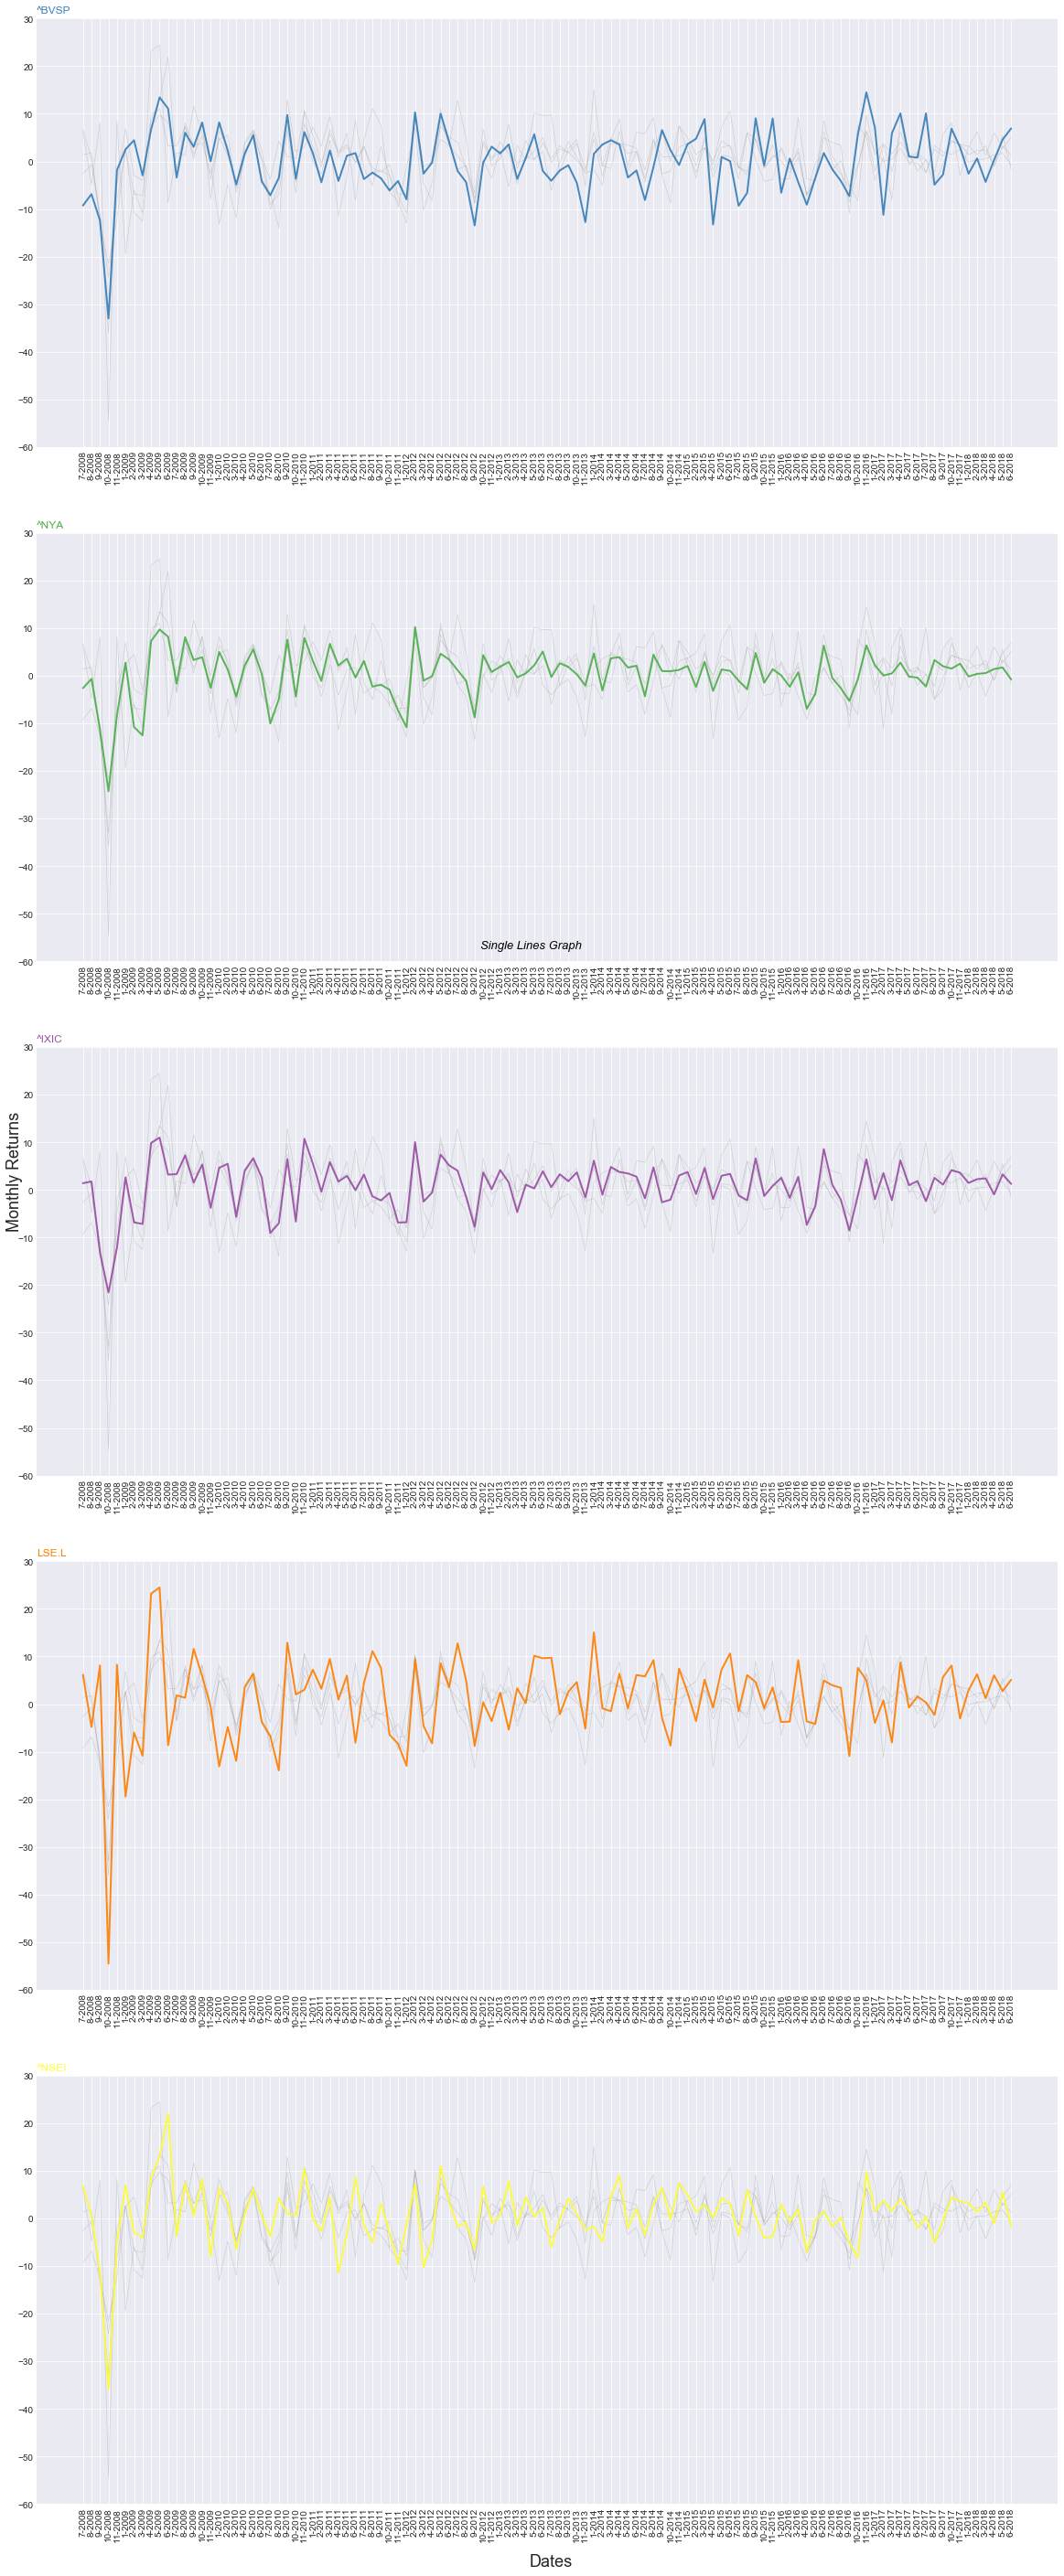

In [11]:
#TASK 05
#Plots each indices return in a different graph over time 
# to observe its behaviour over time and visually check if there is any strong correlation


# Initialize the figure
plt.style.use('seaborn-darkgrid')
# create a color palette
palette = plt.get_cmap('Set1')
plt.figure(figsize=(20,50))
# multiple line plot
num=0
for column in monthly_returns_df.drop('Date', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(5,1, num)
 
    # plot every groups, but discreet
    for v in monthly_returns_df.drop('Date', axis=1):
        plt.plot(monthly_returns_df['Date'], monthly_returns_df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(monthly_returns_df['Date'], monthly_returns_df[column], marker='', color=palette(num), linewidth=2.0, alpha=0.9, label=column)
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    plt.ylim(-60,30)
 
    plt.tick_params(labelleft='on')
    plt.xticks(rotation=90)
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
plt.suptitle("Single Lines Graph", fontsize=13, fontweight=0, color='black', style='italic', y=0.6)
 
# Axis title
plt.text(55, -72, 'Dates', fontsize=18, ha='center', va='center')
plt.text(-8, 220, 'Monthly Returns', fontsize=18, ha='center', va='center', rotation='vertical')
plt.savefig('returns_over_time.pdf', bbox_inches='tight', )

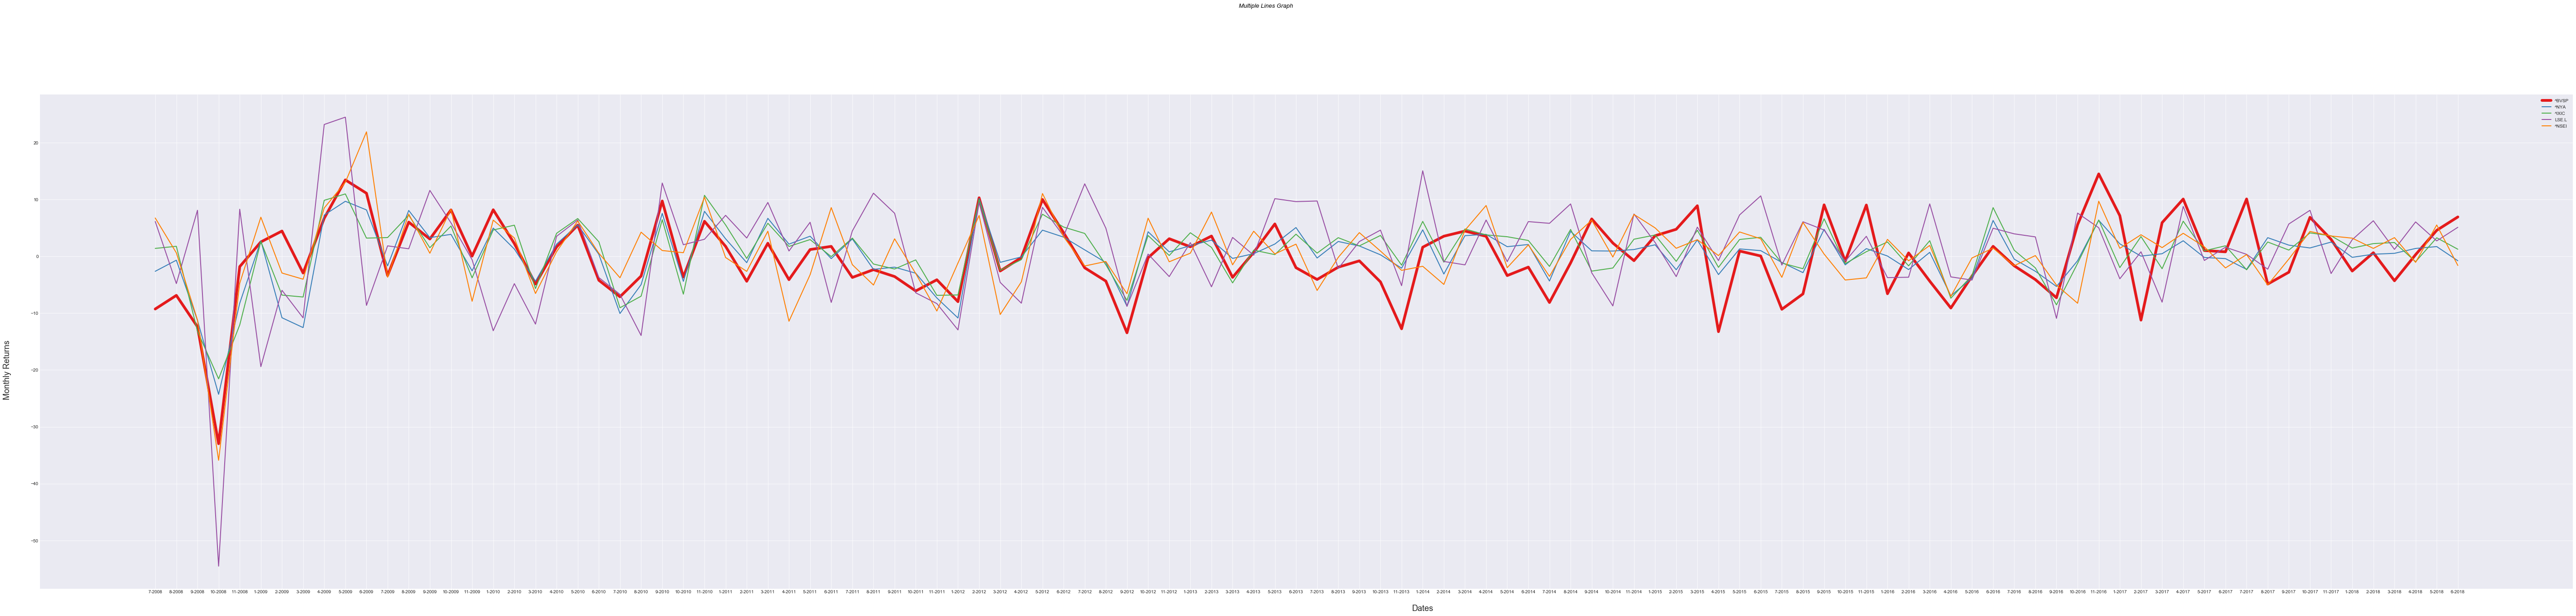

In [6]:
#Plots all indices return in the same graph over time to observe its behaviour over time and visually check if there is any strong correlation
# multiple line plot
# The interest market index is in stronger color
palette = plt.get_cmap('Set1')
plt.figure(figsize=(100,20))

n = 0
x = monthly_returns_df['Date']
for column in monthly_returns_df.drop('Date', axis=1):
    if n==0:
        plt.plot( x, column, data=monthly_returns_df, marker='', color=palette(n), linewidth=6, linestyle='-')
    else:
        plt.plot( x, column, data=monthly_returns_df, marker='', color=palette(n), linewidth=2, linestyle='-')
    n = n+1
        
        
# plt.plot( 'Date', '^NYA', data=monthly_returns_df, marker='', markerfacecolor='blue', markersize=12, color=palette(cont), linewidth=2, linestyle='-')
# plt.plot( 'Date', '^IXIC', data=monthly_returns_df, marker='', color=palette(n), linewidth=2, linestyle='-')
# plt.plot( 'Date', 'LSE.L', data=monthly_returns_df, marker='', color=palette(2), linewidth=2, linestyle='-')
# plt.plot( 'Date', '^NSEI', data=monthly_returns_df, marker='', color=palette(3), linewidth=2, linestyle='-')
# plt.plot( 'Date', '^BVSP', data=monthly_returns_df, marker='', color=palette(4), linewidth=2, linestyle='-')
# general title
plt.suptitle("Multiple Lines Graph", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

# Axis title
plt.text(60, -62, 'Dates', fontsize=18, ha='center', va='center')
plt.text(-7, -20, 'Monthly Returns', fontsize=18, ha='center', va='center', rotation='vertical')
plt.legend()
#plt.savefig('returns_over_time_All_in_One_Graph.pdf', bbox_inches='tight', )


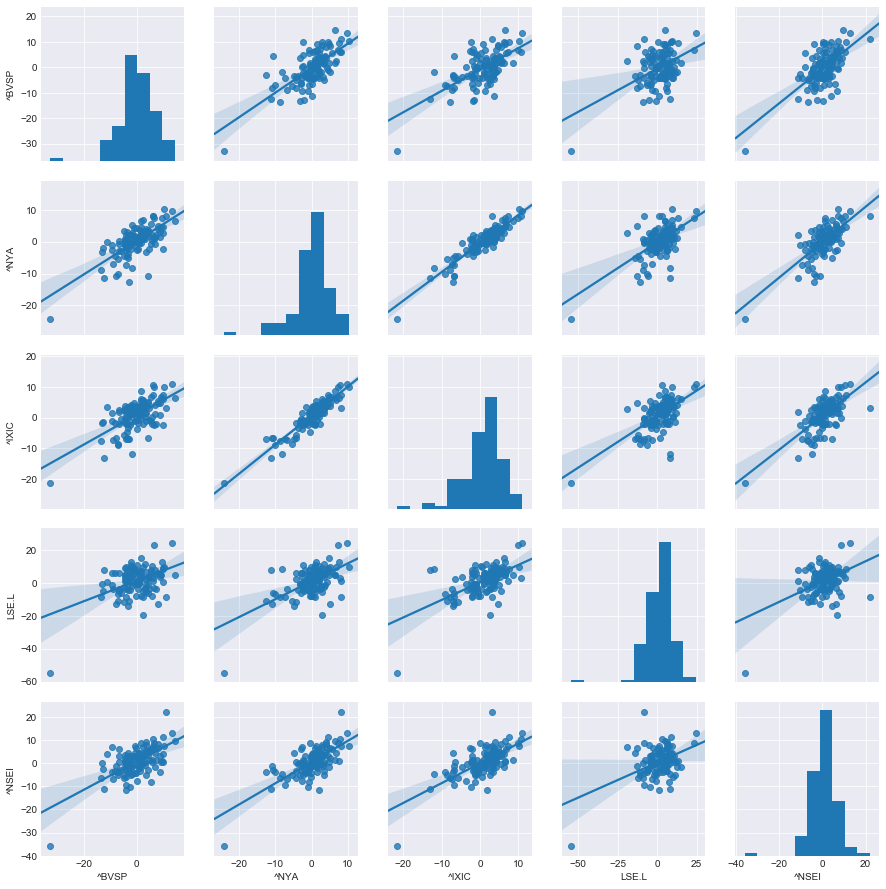



 Basic correlogram


<Figure size 432x288 with 0 Axes>

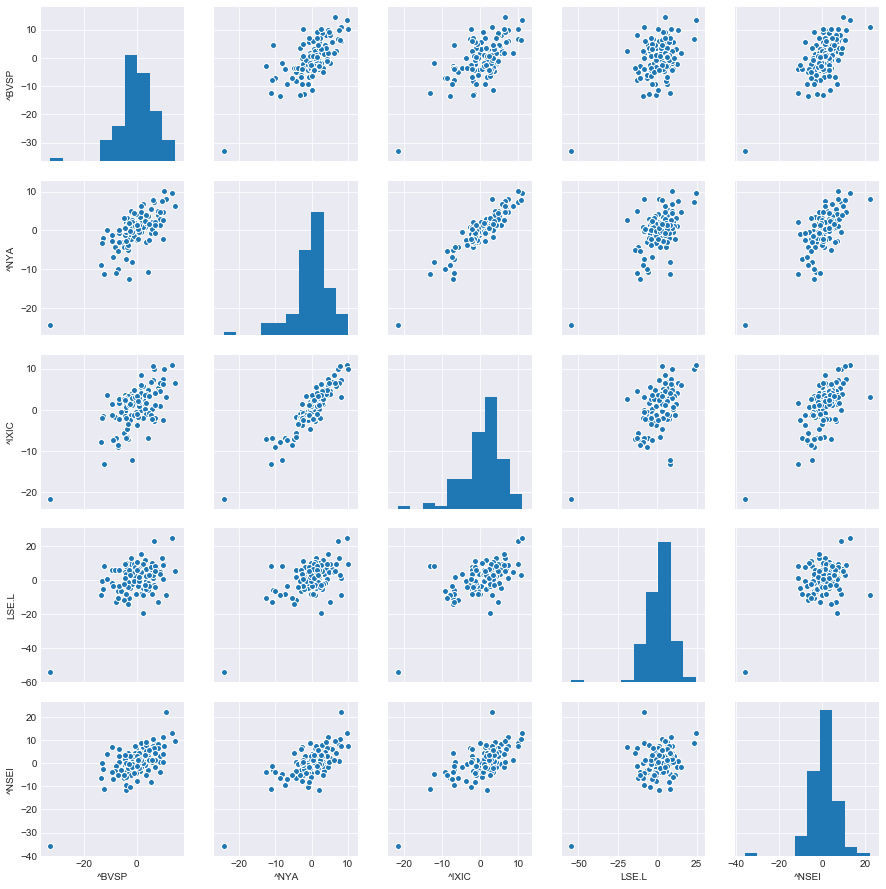

<Figure size 432x288 with 0 Axes>

In [7]:
# with regression
# Plot all of them
sns.pairplot(monthly_returns_df, kind="reg")
plt.show()
#plt.savefig('pairplot_reg.pdf', bbox_inches='tight', )

print('\n\n Basic correlogram')
# Basic correlogram
sns.pairplot(monthly_returns_df)
plt.show()
#plt.savefig('pairplot_corr.pdf', bbox_inches='tight', )

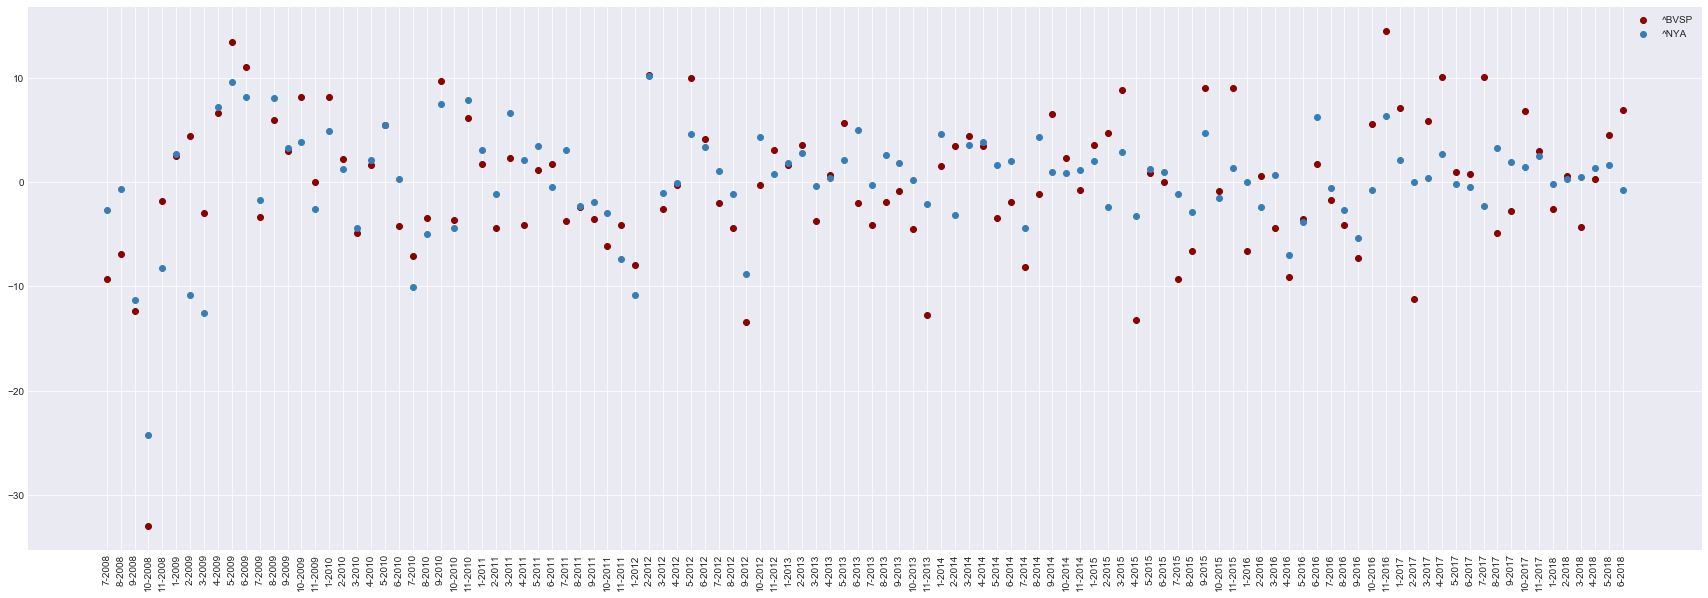

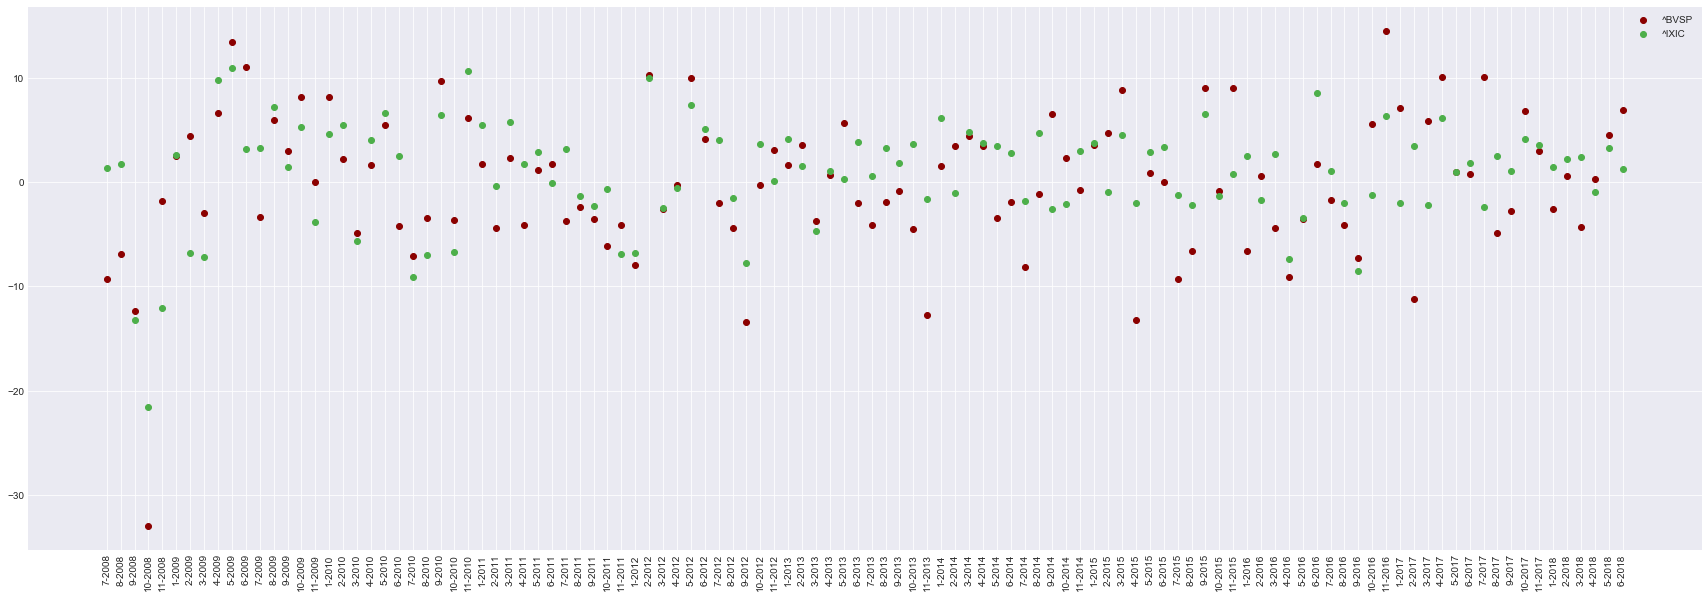

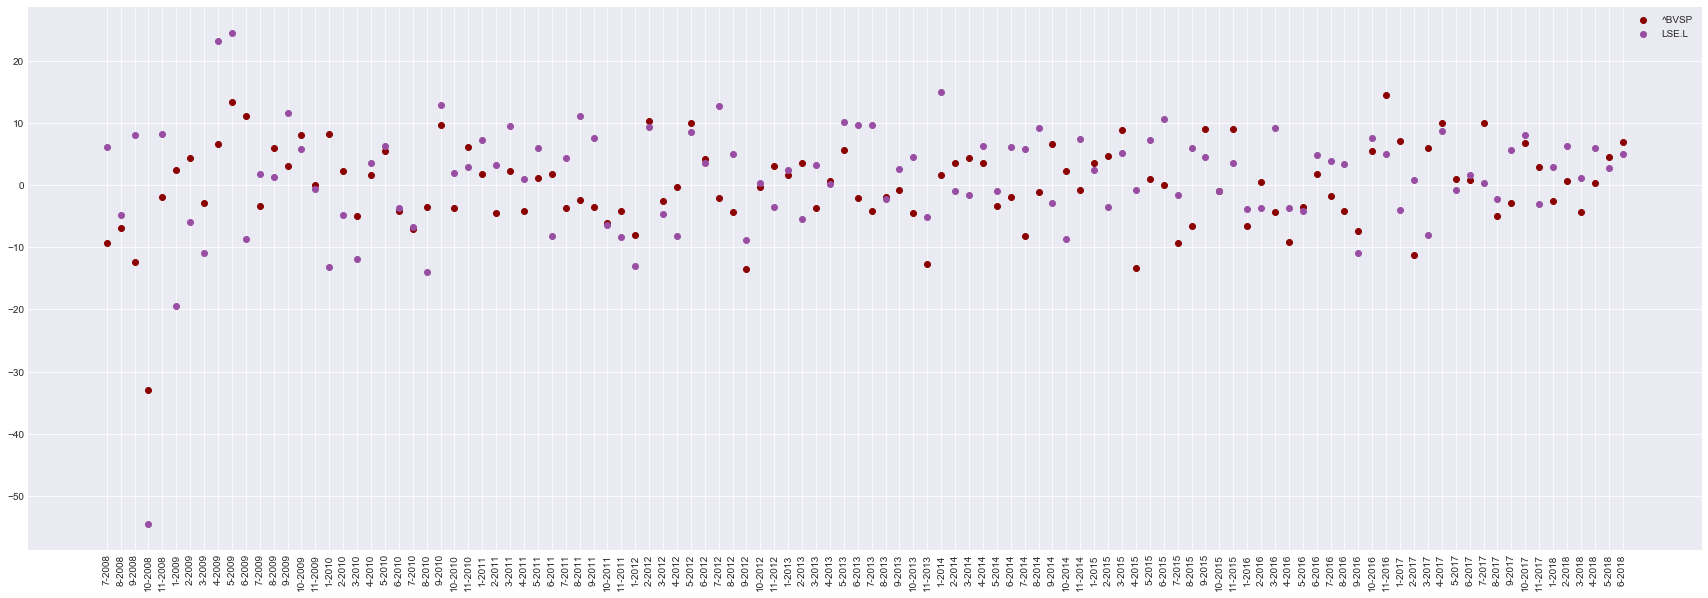

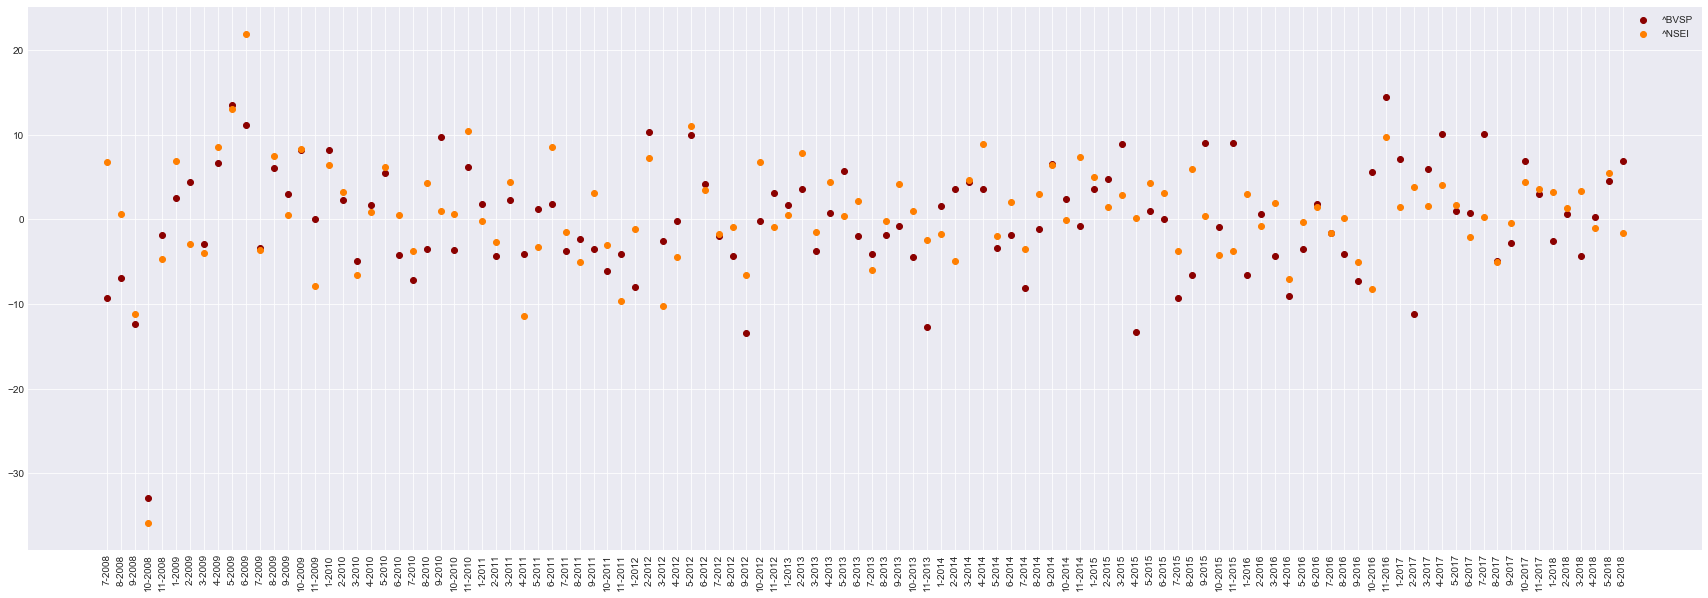

<Figure size 432x288 with 0 Axes>

In [8]:
#Plot only the chosen one agains the others
x = monthly_returns_df[monthly_returns_df.columns[0]]
n = 0
columns = monthly_returns_df.columns[2:6]
y_chosenIndex = monthly_returns_df.columns[1]
for column in columns:
    plt.figure(figsize=(30,10)).add_subplot(111)
    plt.xticks(rotation=90)
    y = monthly_returns_df[column]
    plt.scatter(x, monthly_returns_df[y_chosenIndex], color='darkred', label=y_chosenIndex)
    plt.scatter(x, y, color=palette(n+1), label=column)
    plt.legend()
    plt.show()
    n+=1

#plt.savefig('scatterPlot_againsTheChosenOne.pdf', bbox_inches='tight', )

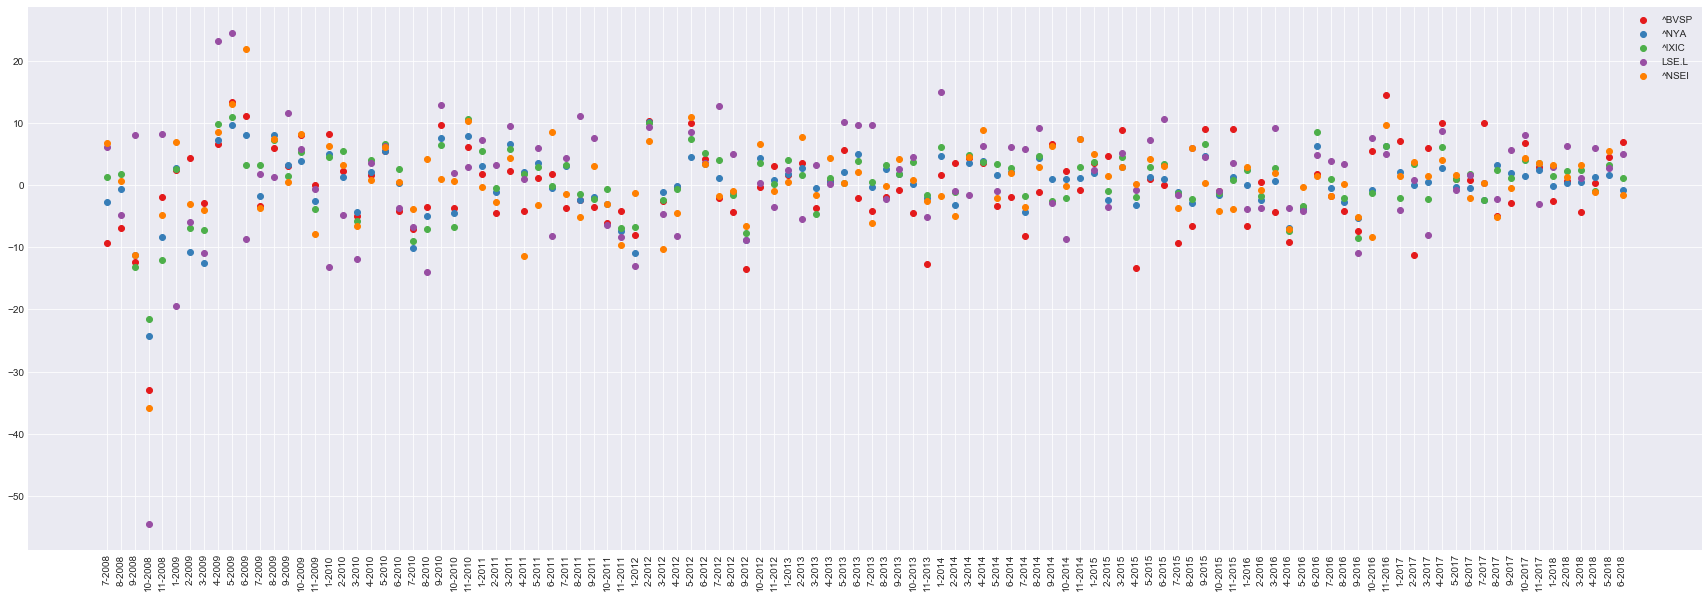

In [9]:
#Plot only the chosen one agains the others
x = monthly_returns_df[monthly_returns_df.columns[0]]
plt.figure(figsize=(30,10)).add_subplot(111)
plt.xticks(rotation=90)
n = 0
for column in monthly_returns_df.columns.drop('Date'):
    y = monthly_returns_df[column]
    plt.scatter(x, y, color=palette(n), label=column)
    n+=1
plt.legend()
#plt.savefig('scatterPlot.pdf', bbox_inches='tight', )
plt.show()

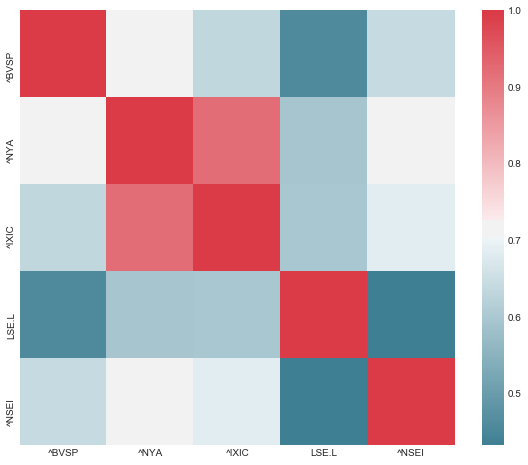

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
corr = monthly_returns_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)